### Automatic Large-Scale Data Acquisition via Crowdsourcing for Crosswalk Classification: A Deep Learning Approach

Download the model (GSV-FA\* or GSV-PA\*) you want to test [here](https://github.com/rodrigoberriel/streetview-crosswalk-classification/tree/master/models).

BibTeX:

    @article{berriel2017cag,
        Author  = {Rodrigo F. Berriel and Franco Schmidt Rossi and Alberto F. de Souza and Thiago Oliveira-Santos},
        Title   = {{Automatic Large-Scale Data Acquisition via Crowdsourcing for Crosswalk Classification: A Deep Learning Approach}},
        Journal = {Computers \& Graphics},
        Year    = {2017},
        Volume  = {68},
        Pages   = {32--42},
        DOI     = {10.1016/J.CAG.2017.08.004},
        ISSN    = {00978493},
    }

In [1]:
import os
import caffe
import numpy as np
import matplotlib.pyplot as plt

# set display defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['image.interpolation'] = 'nearest'

# set caffe mode
caffe.set_mode_gpu()

In [2]:
model_name = "gsv-pa"
BATCH_SIZE = 4

model_def = "../models/deploy.prototxt"
model_weights = "../models/{}/{}.caffemodel".format(model_name.upper(), model_name.lower())
model_mean = "../models/{}/mean.binaryproto".format(model_name.upper())
labels = ['No-Crosswalk', 'Crosswalk']

In [3]:
images_fname = [
    os.path.join(root, fname) 
    for root, _, files in os.walk('../samples') 
    for fname in files
]
images = [caffe.io.load_image(image_fname) for image_fname in images_fname]

In [4]:
with open(model_mean, 'rb') as meanfile:
    blob = caffe.proto.caffe_pb2.BlobProto()
    blob.ParseFromString(meanfile.read())
    mean_values = np.array(caffe.io.blobproto_to_array(blob))[0]
    mean_values = mean_values.transpose(1, 2, 0)
    mean_values = caffe.io.resize_image(mean_values, (224, 224), 2)
    mean_values = mean_values.transpose(2, 0, 1)

In [5]:
from caffe.classifier import Classifier
c = Classifier(
    model_def, 
    model_weights, 
    mean=mean_values,
    raw_scale=255,
    channel_swap=(2,1,0),
    image_dims=(256, 256)
)
c.blobs['data'].reshape(BATCH_SIZE, 3, 224, 224)
c.blobs['softmax'].reshape(BATCH_SIZE, 3)
c.reshape()

In [6]:
cls = c.predict(images)

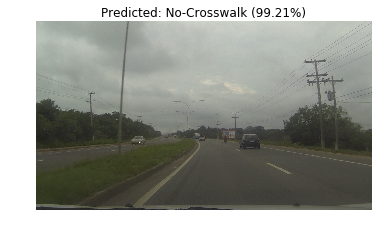

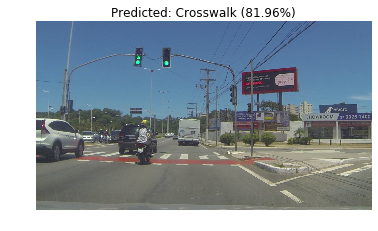

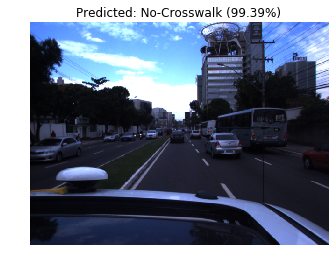

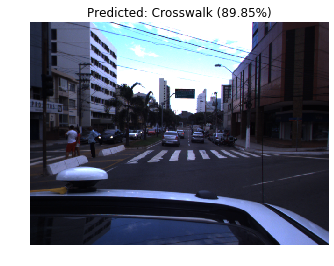

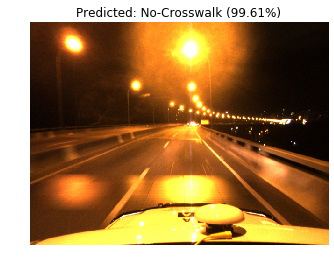

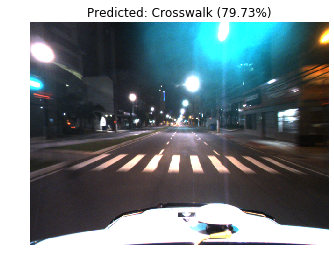

In [7]:
for i in range(len(cls)):
    class_max = cls[i, :].argmax()
    plt.imshow(images[i])
    plt.title('Predicted: {} ({:.2f}%)'.format(labels[class_max], 100 * cls[i, class_max]))
    plt.axis('off')
    plt.show()